In [1237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1238]:
# getting the dataset

df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


- The varable **total** is the amount of people invloved in a fatal car accident. States are different sizes and so numbers vary per billion miles. This variable is not the total ammount of accidents that took place.   
- The variables **speeding**,	**alcohol**, **not_distracted**	, **no_previous** are all based on the amount of people who were invovled in that type of car accident.  
- The variables **ins_premium** and 	**ins_losses** are based on currencies possible USD . 	 

In [1239]:
df.isna().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [1240]:
df.drop_duplicates(inplace=True)

In [1241]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


### 1) What is the distribution of the total number of accidents across states?            

<Axes: xlabel='abbrev', ylabel='total'>

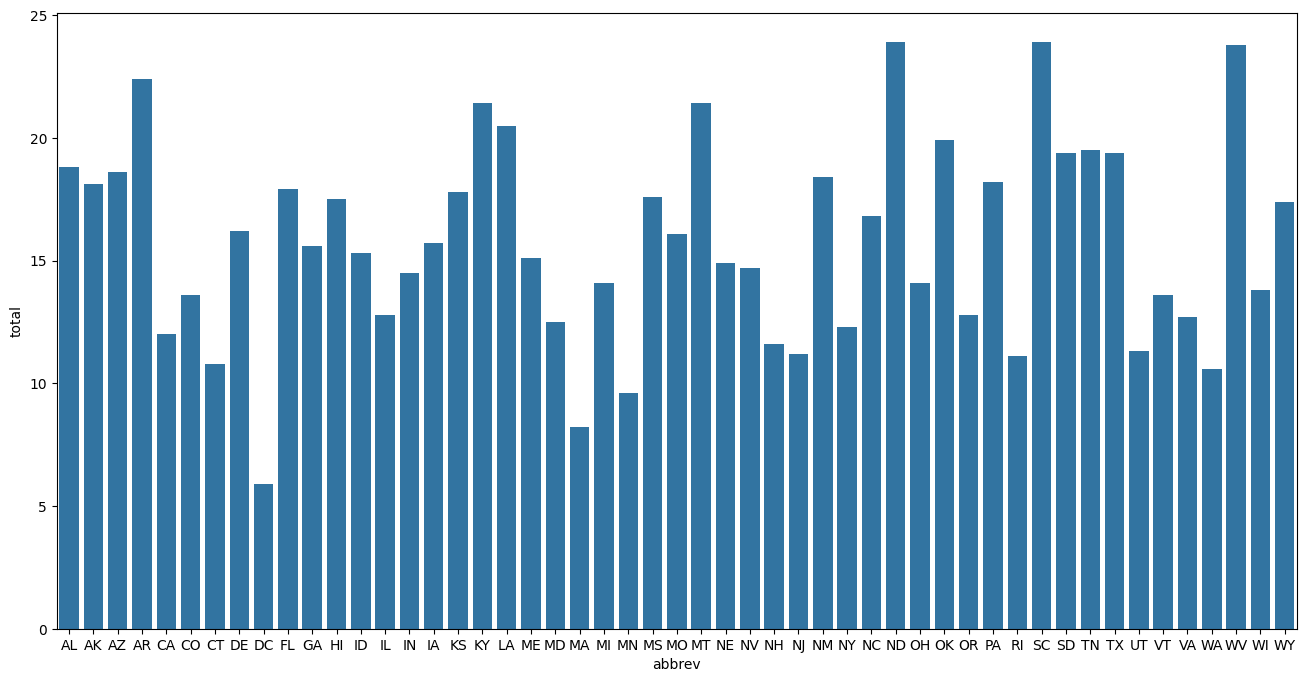

In [1242]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x="abbrev", y="total")

The distribution of total number of accidents across states is all over the place. There seems to be no correlation because all the values between the different states since they are all independent variables.

### 2) What is the relationship between the number of speeding-related accidents and the number of alcohol-related accidents?


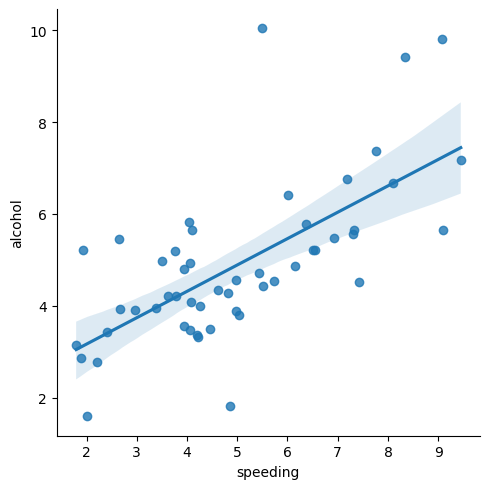

In [1243]:
sns.lmplot(data=df, x="speeding", y="alcohol")

In [1244]:
speed_alcohol_corr = df["speeding"].corr(df["alcohol"])

print(f"There is a correlation of {speed_alcohol_corr:.2f} between speeding and alcohol")

There is a correlation of 0.67 between speeding and alcohol


There is a strong correlation between speeding and alcohol

### 3) Is there a correlation between the total number of accidents and the drivers who were speeding?

There is a correlation of 0.61 between speeding and total


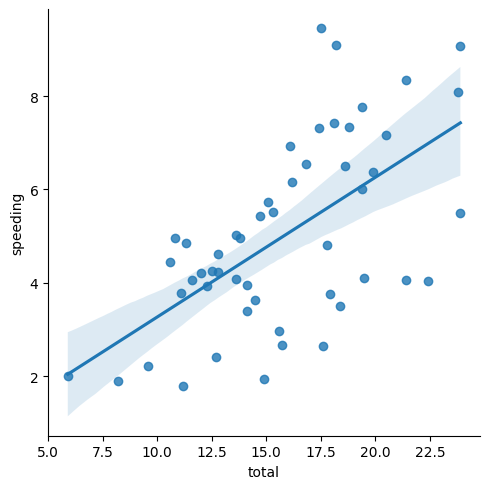

In [1245]:
sns.lmplot(data=df, y="speeding", x="total")

speed_total_corr = df["speeding"].corr(df["total"])

print(f"There is a correlation of {speed_total_corr:.2f} between speeding and total")

- Speeding and total do in fact have a correlation of 0.61. The diagram above shows a correlation that is strong
- The points show a relatonship but one that is not strong enough to be used for classfiying or regression 
- This might be because the total variable might be derived from the speeding variable. 

### 4) Does the proportion of drivers who were not distracted have an effect on the total number of accidents?

<Axes: xlabel='not_distracted', ylabel='total'>

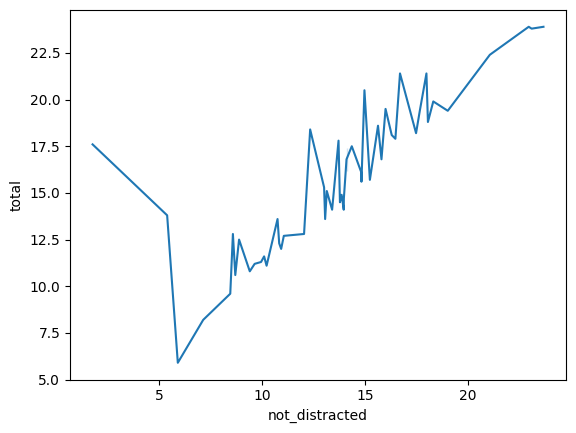

In [1246]:
sns.lineplot(df, y="total", x="not_distracted")

i

### 5) Is there a relationship between the number of car accidents and the type of day of the week?

The dataset has no column or data points that show days of a week and so there is no relationship between car accidents and type of day of week. It would be impossible to show this relationship because this data does not exist

### 6) How well can you predict the number of car crashes in a state based on the other variables in the dataset?


Text(0.5, 1.0, 'Spearman')

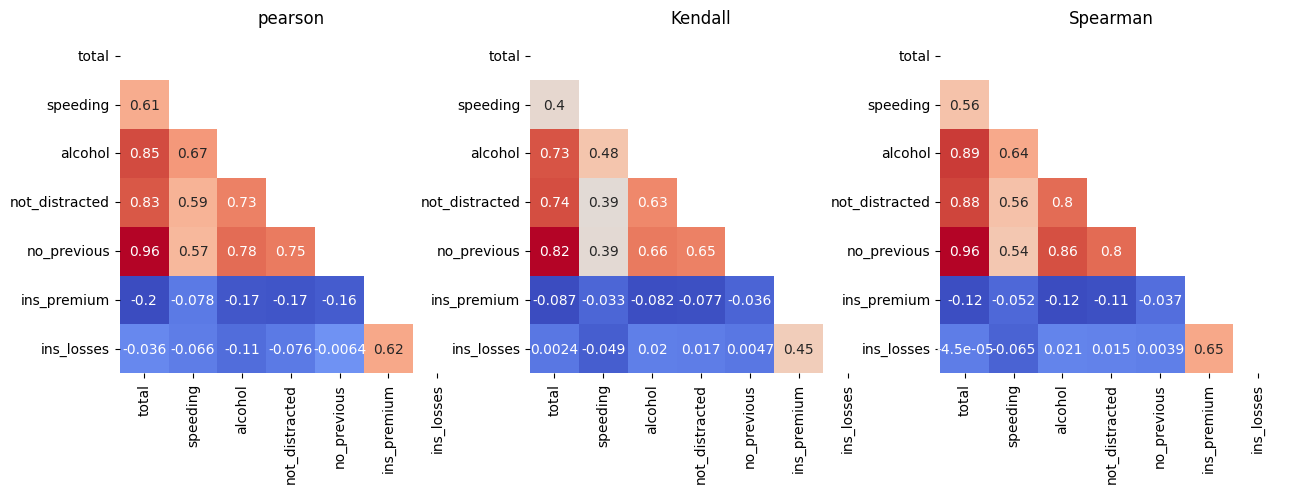

In [1247]:
# we can use linear regression to predict this
# y variable could be total 

# removing the abbrev for the corr heatmap
df_linear = df.drop(axis=1, labels=["abbrev"])

pearson = df_linear.corr(method="pearson")
kendall = df_linear.corr(method="kendall")
spearman = df_linear.corr(method="spearman")

mask = np.triu(df_linear.corr())

fig, axis = plt.subplots(ncols=3, figsize=(15, 8))
sns.heatmap(pearson, cmap="coolwarm",annot=True, cbar=False, square=True, mask=mask, ax=axis[0])
axis[0].set_title("pearson")

sns.heatmap(kendall, cmap="coolwarm",annot=True, cbar=False, square=True, mask=mask, ax=axis[1])
axis[1].set_title("Kendall")

sns.heatmap(spearman, cmap="coolwarm",annot=True, cbar=False, square=True, mask=mask, ax=axis[2])
axis[2].set_title("Spearman")

There is a strong correlation between **no_previous**, **not_distracted** and **alcohol**.  
So we need to see how they are distributed so show what type of relationship they have with the total column.  

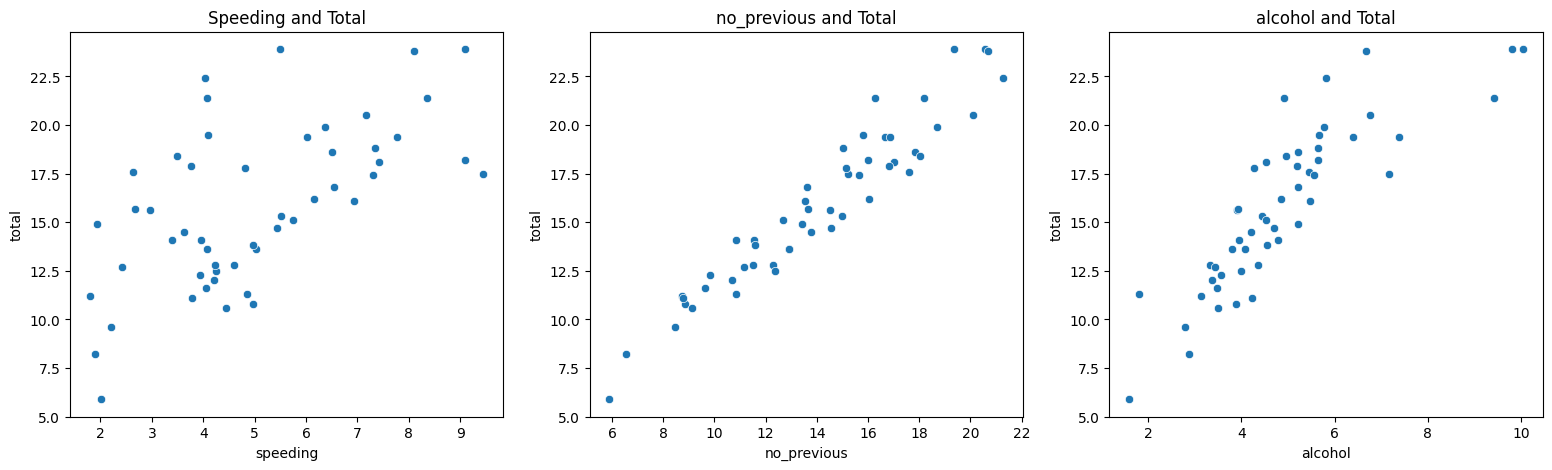

In [1248]:
fig, axis =  plt.subplots(ncols=3, figsize=(19,5))


sns.scatterplot(data=df, x="speeding", y="total", ax=axis[0])
axis[0].set_title("Speeding and Total")

sns.scatterplot(data=df, x="no_previous", y="total", ax=axis[1])
axis[1].set_title("no_previous and Total")

sns.scatterplot(data=df, x="alcohol", y="total", ax=axis[2])
axis[2].set_title("alcohol and Total")

plt.show()

We can see from the Scattor plot that **no_previous** and **total** have a linear relationship.  
We can use linear regression to predict the number of car crashses in a state based on **no_previous**.  
We could possible use **alcohol** as another bases for predicting aswell  


In [1249]:
# implementing linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df_linear["total"]
X = np.column_stack((np.ones(len(df_linear["no_previous"])),df_linear["no_previous"]))  # making no_previous a 2-D matrix


# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear = LinearRegression()

# training the model
linear.fit(X_train, y_train)

# model evaluation 
score = linear.score(X_test, y_test)

print(f"The R-squared score is {score:.2f}")


The R-squared score is 0.85


We achieved a $R^2$ score of 0.84 which is very good and shows that we can predict the number of car crashes in a state based on other varibles such as **no_previous** 

##### 7. How effectively can you classify the states into low, medium and high number of car crashes based on the other variables in the dataset? Avoid using machine learning by binning according to EDA for maximum separation of the three classes. Analyze your results by speaking to a countplot and metrics like accuracy and F1 score for classification.


TotalCategory
high      21
low       18
medium    12
Name: count, dtype: int64


Text(0.5, 1.0, 'Bin Ground Truth')

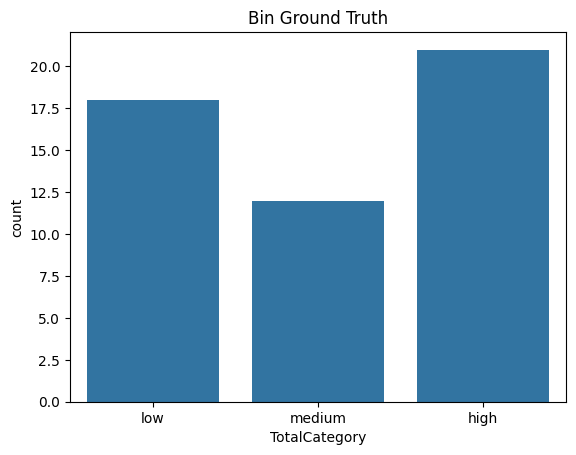

In [1250]:
# getting ground truth
df_binned = df.copy() 
labels = ["low", "medium", "high"]
df_binned["TotalCategory"] = pd.cut(df["total"], bins=[0, 14, 17, float("inf")], labels=labels)

print(df_binned["TotalCategory"].value_counts())


axis = sns.countplot(df_binned, x="TotalCategory")
axis.set_title("Bin Ground Truth")

[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


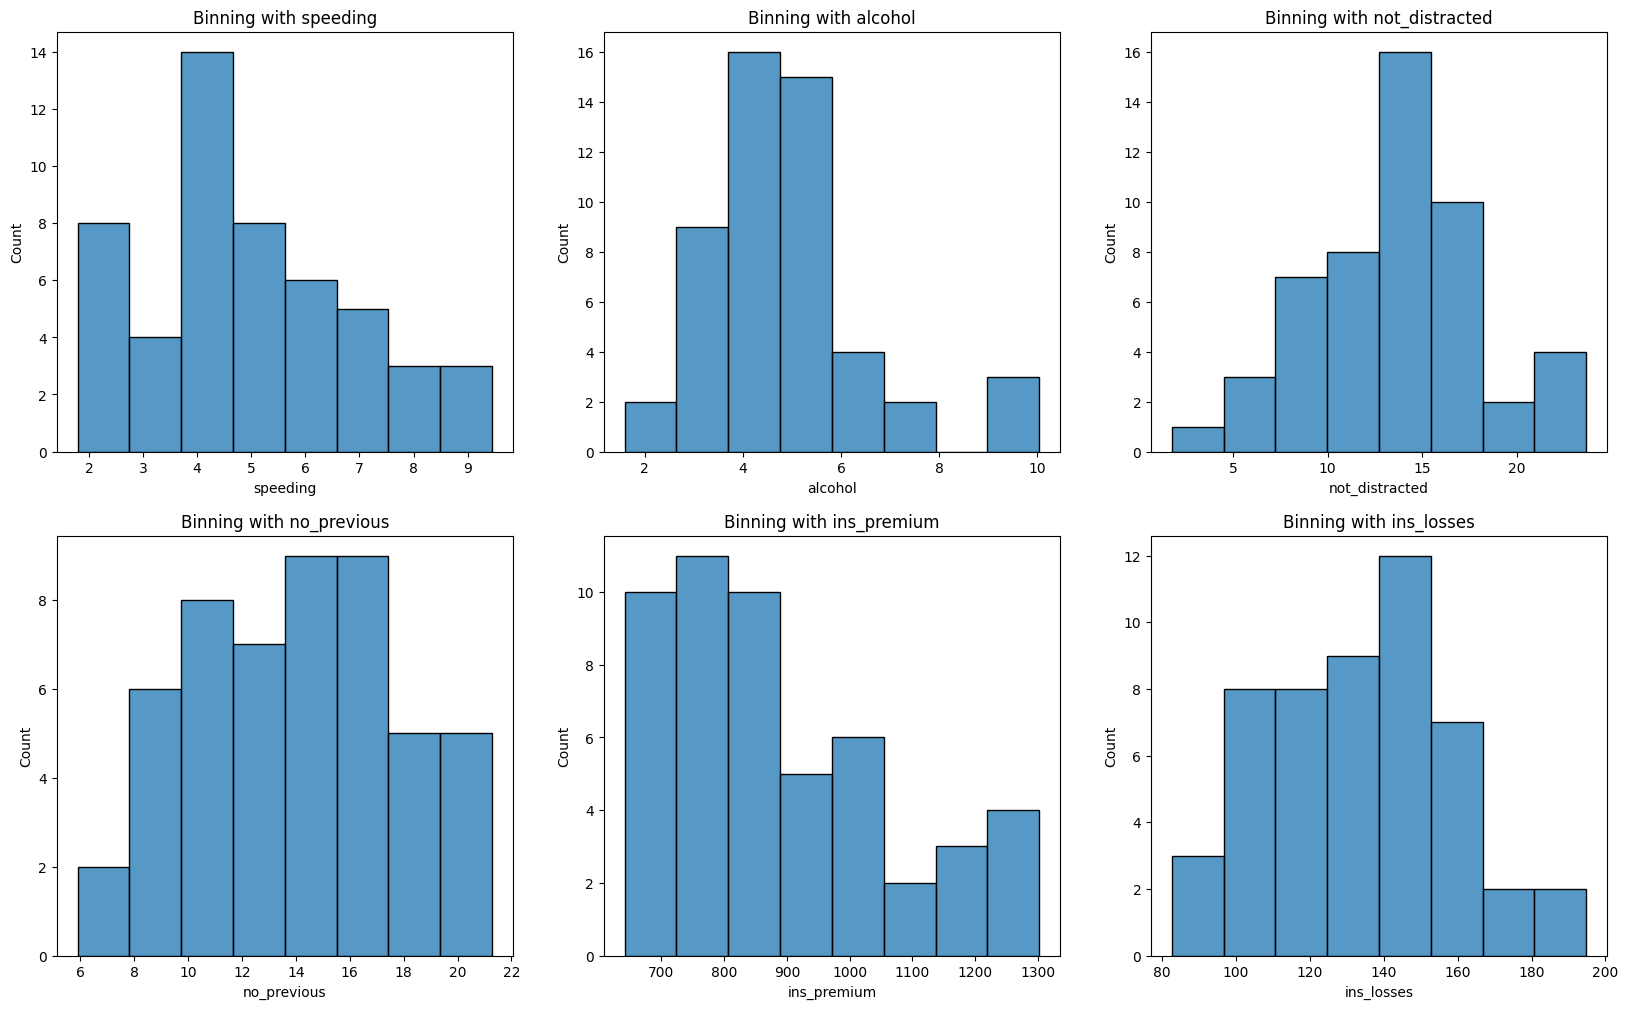

In [1251]:
# let's drop columns first
df_linear.drop(labels=["total"], inplace=True, axis=1)

rows = len(df_binned.columns) // 3  # calculating the rows 

fig, axis =  plt.subplots(ncols=3, nrows=(rows - 1), figsize=(20,12))
print(axis)

# creating histograms for all the independent variables do show the distribution of each bin
i = 0
j = 0 
for col in df_linear.columns:
    if (j % 3 == 0) and (j !=0):
        i+=1
        j = 0
    sns.histplot(df, x=f"{col}", bins=8, ax=axis[i][j])
    axis[i][j].set_title(f"Binning with {col}")
    j+=1


- I think a combination of the independent varibales would be the best in determining the most appropriate way to bin the states into low, medium and high.  
- This can be possible done in almost the same way a decision tree decides how to classfiy things
- I want the first bin from **no_previous** were it covers values between (6, 12] 
- The second bin is going to be from **in_premium** and using the values (800, 1000].
- The last bin will be the rest of the values 
- This might take quite a bit of adjusting to match the ground truth

In [1252]:
# creating the new bins

df_binned["bins"] = "medium" # this is the default

df_binned.loc[df["not_distracted"] >= 15, "bins"] = "high"
df_binned.loc[df["no_previous"] <= 13, "bins"] = "low"

df_binned["bins"].value_counts()

bins
low       21
high      17
medium    13
Name: count, dtype: int64

In [1253]:
df_binned.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev', 'TotalCategory', 'bins'],
      dtype='object')

In [1254]:
# calculating the f1 score and accuracy
from sklearn.metrics import accuracy_score, f1_score

y = df_binned["TotalCategory"]
y_pred = df_binned["bins"]

accuracy = accuracy_score(y, y_pred)
f1score = f1_score(y, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1score)


Accuracy: 0.7843137254901961
F1 Score: 0.7826339604667778


It seems far easier to classfy low and High and leave the rest as medium 

### Task 2: Discussion via Actionable Insights

The **car_crashes** dataset is very hard to analyze because at first glance the data does not seem to make sense. It took me a while to realize that the variables that deal with several crashes shared some data points. Some data points in **speeding** might be found in **not_distracted** and **no_previous** but are not explicitly conveyed. if the dataset had more separation of values between different columns it would help analyze the dataset more accurately.  

This data might be biased as well. People could have lied that they were not distracted. There is also a high correlation between people who had never been previously been in a car accident and the total variable. Does this variable mean that these people had never been involved in a fatal car accident before that and if so then the car accident would not be fatal

I do not think that i can provide actionable insights to help SANRAL that could help them improve road  safetly. South Africa and the unted sates of America are tow comletely diferent enviroments. The **car_crashes** dataset does not consider the terrain or the road quaility that could be a factor in south Africa.  

The amount paid to **insurance companies** and amount of **losses** incurred by insurance compaines could be vastly different beacause of the different types of business models used in both contires. The living costs  and standard of livng costs in USA is higher and that could not translate to South Africa.

#### Safe System Approach 
The New Zealand government and later European countries adopted a safe system approach to reduce the amount of road accidents that occur by putting safety at the forefront of their policies relating to road accidents and motor vehicles.  

**Safe infrastructure**: This includes creating infrastructure that can reduce the severity of accidents and promote safety. This can include better separation between drivers going at different speeds. This could also include a clear separation between the road and the opposing lane

**Speeding limits**: Surviving high-speed crashes is less likely for humans and reducing the speed limit increasing the fines for intoxication and using a mobile device could prevent people from getting into these situations.

**Post-Crash care**: If a good emergency system for individuals involved in crashes is available this could save countless lives. This could involve faster response times or police officers assessing why the accident occurred and trying to mitigate it by employing reforms or laws around that particular road


All the infromation i used came from the website: [highways](https://highways.dot.gov/public-roads/winter-2022/01)